# Gensim word vector visualization of various word vectors

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
import gensim.downloader as api

For looking at word vectors, we'll use Gensim. Gensim isn't really a deep learning package. It's a package for word and text similarity modeling, which started with topic models and grew into SVD and neural word representations. But its efficient and scalable, and quite widely used.

We use GloVe word vectors. See [the Glove page](https://nlp.stanford.edu/projects/glove/) for details. Gensim has functionality to download a pre-trained model and load it. (We use the 100d vectors below as a mix between speed and smallness vs. quality. If you try out the 50d vectors, they basically work for similarity but clearly aren't as good for analogy problems. If you load the 300d vectors, they're even better than the 100d vectors.)

In [2]:
model = api.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [3]:
model['bread']

array([-0.66146  ,  0.94335  , -0.72214  ,  0.17403  , -0.42524  ,
        0.36303  ,  1.0135   , -0.14802  ,  0.25817  , -0.20326  ,
       -0.64338  ,  0.16632  ,  0.61518  ,  1.397    , -0.094506 ,
        0.0041843, -0.18976  , -0.55421  , -0.39371  , -0.22501  ,
       -0.34643  ,  0.32076  ,  0.34395  , -0.7034   ,  0.23932  ,
        0.69951  , -0.16461  , -0.31819  , -0.34034  , -0.44906  ,
       -0.069667 ,  0.35348  ,  0.17498  , -0.95057  , -0.2209   ,
        1.0647   ,  0.23231  ,  0.32569  ,  0.47662  , -1.1206   ,
        0.28168  , -0.75172  , -0.54654  , -0.66337  ,  0.34804  ,
       -0.69058  , -0.77092  , -0.40167  , -0.069351 , -0.049238 ,
       -0.39351  ,  0.16735  , -0.14512  ,  1.0083   , -1.0608   ,
       -0.87314  , -0.29339  ,  0.68278  ,  0.61634  , -0.088844 ,
        0.88094  ,  0.099809 , -0.27161  , -0.58026  ,  0.50364  ,
       -0.93814  ,  0.67576  , -0.43124  , -0.10517  , -1.2404   ,
       -0.74353  ,  0.28637  ,  0.29012  ,  0.89377  ,  0.6740

In [4]:
model['croissant']

array([-0.25144  ,  0.52157  , -0.75452  ,  0.28039  , -0.31388  ,
        0.274    ,  1.1971   , -0.10519  ,  0.82544  , -0.33398  ,
       -0.21417  ,  0.22216  ,  0.14982  ,  0.47384  ,  0.41984  ,
        0.69397  , -0.25999  , -0.44414  ,  0.58296  , -0.30851  ,
       -0.076455 ,  0.33468  ,  0.28055  , -0.99012  ,  0.30349  ,
        0.39128  ,  0.031526 , -0.095395 , -0.004745 , -0.81347  ,
        0.27869  , -0.1812   ,  0.14632  , -0.42186  ,  0.13857  ,
        1.139    ,  0.14925  , -0.051459 ,  0.37875  , -0.2613   ,
        0.011081 , -0.28881  , -0.38662  , -0.3135   , -0.1954   ,
        0.19248  , -0.52995  , -0.40674  , -0.25159  ,  0.06272  ,
       -0.32724  ,  0.28374  , -0.2155   , -0.061832 , -0.50134  ,
        0.0093959,  0.30715  ,  0.3873   , -0.74554  , -0.45947  ,
        0.40032  , -0.1378   , -0.26968  , -0.3946   , -0.64876  ,
       -0.47149  , -0.085536 ,  0.092795 , -0.034018 , -0.61906  ,
        0.19123  ,  0.20563  ,  0.29056  , -0.010908 ,  0.1531

In [5]:
model.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.927285373210907),
 ('clinton', 0.896000325679779),
 ('mccain', 0.8875633478164673),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933662533760071),
 ('dole', 0.7851964831352234),
 ('rodham', 0.7518897652626038),
 ('romney', 0.7488929629325867),
 ('kerry', 0.7472624182701111)]

In [6]:
model.most_similar('banana')

[('coconut', 0.7097253203392029),
 ('mango', 0.7054824829101562),
 ('bananas', 0.6887733340263367),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420575976371765),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.6294420957565308),
 ('papaya', 0.6246591210365295)]

In [7]:
model.most_similar(negative='banana')

[('shunichi', 0.49618104100227356),
 ('ieronymos', 0.4736502170562744),
 ('pengrowth', 0.4668096601963043),
 ('höss', 0.4636845588684082),
 ('damaskinos', 0.4617849290370941),
 ('yadin', 0.4617374837398529),
 ('hundertwasser', 0.4588957726955414),
 ('ncpa', 0.4577339291572571),
 ('maccormac', 0.4566109776496887),
 ('rothfeld', 0.4523947238922119)]

In [8]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [9]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [10]:
analogy('pencil', 'sketching', 'camera')

'photographing'

In [11]:
analogy('japan', 'japanese', 'australia')

'australian'

In [12]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [13]:
analogy('tall', 'tallest', 'long')

'longest'

In [14]:
analogy('good', 'fantastic', 'bad')

'terrible'

In [15]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [22]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.index_to_key), sample)
        else:
            words = [ word for word in model.vocab ]

    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

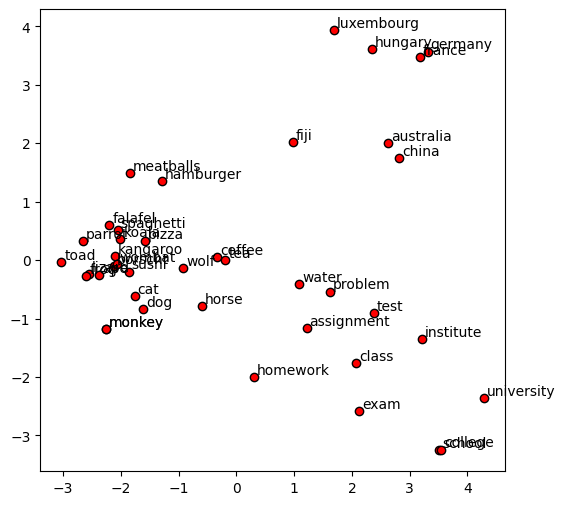

In [23]:
display_pca_scatterplot(model,
                        ['coffee', 'tea', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

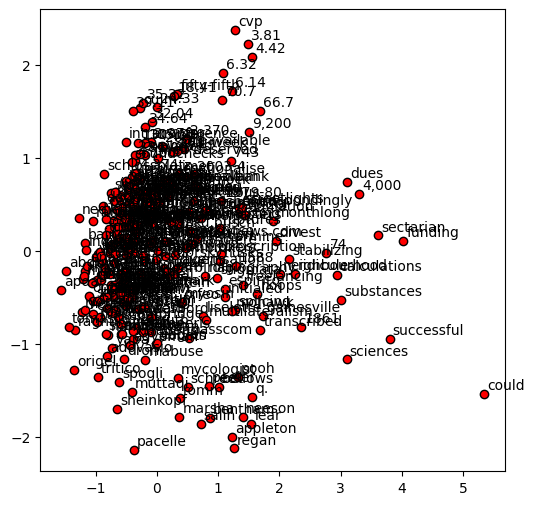

In [24]:
display_pca_scatterplot(model, sample=300)

Some Word Vectors for Arabic:
- https://github.com/bakrianoo/aravec/
- https://github.com/tarekeldeeb/GloVe-Arabic

If you feel adventurous, go ahead and load one of the models in gensim and try some analogy or related NLP task.